# 1.0 PROBLEM STATEMENT

#### SUPPLY CHAIN ANALYSIS
- This project provides a detailed supply chain analysis using a dataset that includes sales, inventory, costs, and supplier data to optimize operations and improve efficiency.

- The objective is to analyze the supply chain data to identify inefficiencies, optimize inventory management, reduce costs, and enhance overall operational effectiveness across multiple product lines.

#### DataSet

- Here is a dataset that is collected from a Fashion and Beauty startup via Kaggle. The dataset is based on the supply chain of Makeup products. Below are all the features in the dataset:

    - Product Type
    - SKU
    - Price
    - Availability
    - Number of products sold
    - Revenue generated
    - Customer demographics
    - Stock levels
    - Lead times
    - Order quantities
    - Shipping times
    - Shipping carriers
    - Shipping costs
    - Supplier name
    - Location
    - Lead time
    - Production volumes
    - Manufacturing lead time
    - Manufacturing costs
    - Inspection results
    - Defect rates
    - Transportation modes
    - Routes
    - Costs

# 2.0 DATA COLLECTION

**2.1 Import Libraries**

In [4]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import seaborn as sns

**2.1 Read Data**

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
%cd /content/drive/MyDrive/SupplyChainAnalysis/

/content/drive/MyDrive/SupplyChainAnalysis


In [7]:
%ll

total 656
-rw------- 1 root  21053 Apr 30 22:24 Dataset_Supply_Chain.csv
-rw------- 1 root  17217 May  4 00:11 Dataset_Supply_Chain_Updated.csv
-rw------- 1 root 259921 Apr 30 23:55 Dev_Code_Supply-Chain-Analysis.ipynb
-rw------- 1 root 372133 May 10 00:14 DVL_Code_SupplyChainAnalysis_Final_Version.ipynb


In [8]:
dataset = pd.read_csv("Dataset_Supply_Chain_Updated.csv")

In [9]:
dataset.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Female,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Female,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Female,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# 3.0 DATA PREPROCESSING

In [7]:
dataset.shape

(100, 24)

In [8]:
dataset.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [9]:
dataset.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

**3.1 Adding Location Coordinates**
- To use it for location mapping

In [13]:
dataset.Location.unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

In [14]:
print(dataset.Location.unique())

# Get a file with City coordinates

['Mumbai' 'Kolkata' 'Delhi' 'Bangalore' 'Chennai']


# 4.0 DATA ANALYSIS

## 4.1 Sales and Marketing Analysis

**4.1.1 Product type and Price**

- Analyzing the Supply Chain by looking at the relationship between the price of the products and the revenue generated by them:

In [10]:
fig = px.scatter(dataset, x='Price',
                 y='Revenue generated',
                 color='Product type',
                 hover_data=['Number of products sold'],
                 trendline="ols")
fig.show()

- COMMENT ON THE GRAPH

**4.1.2 Sales by Product Type**

- This segment will focus on analyzing trends in the number of products sold and the revenue generated:

In [26]:
sales_data = dataset.groupby('Product type')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
                   title='Sales by Product Type',
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

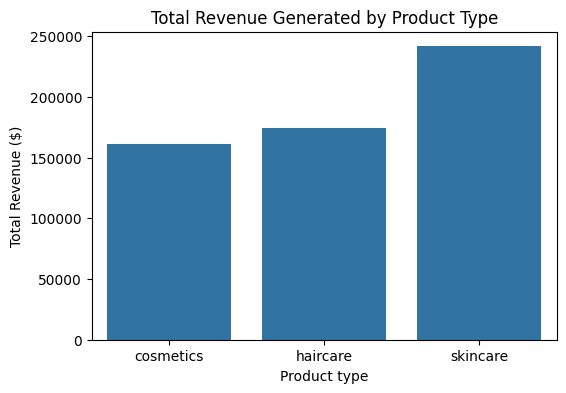

In [13]:
sales_summary = dataset.groupby('Product type')[['Number of products sold', 'Revenue generated']].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=sales_summary.index, y='Revenue generated', data=sales_summary)
plt.title('Total Revenue Generated by Product Type')
plt.ylabel('Total Revenue ($)')
plt.show()

- 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics.

- The company derives more revenue from skincare products, and the higher the price of skincare products, the more revenue they generate.

**4.1.3 Customer and Market Insights**
- Understanding customer demographics and preferences across different regions or demographic groups.

In [20]:
customer_demographics = dataset['Customer demographics'].value_counts().reset_index()
customer_demographics.columns = ['Demographics', 'Number of Customers']

fig = px.bar(customer_demographics, x='Demographics', y='Number of Customers',
             title='Customer Distribution by Demographics',
             labels={'Demographics': 'Customer Demographics', 'Number of Customers': 'Number of Customers'})
fig.show()


- Almost one-third of the dataset doesn't contain specified gender of the customers. GUI improvement needed in the CRM to better capture customer's gender or encourage customer to share it.
- Female and Male, the known data is significantly dominated by the female gender with 48%.

In [23]:
# Grouping data to find the most popular product by gender based on number of products sold
popular_product_by_gender = dataset.groupby(['Customer demographics', 'Product type']).agg({'Number of products sold': 'sum'}).reset_index()

# Finding the product with maximum sales for each gender
popular_product_by_gender = popular_product_by_gender.loc[popular_product_by_gender.groupby('Customer demographics')['Number of products sold'].idxmax()]

fig = px.bar(popular_product_by_gender, x='Customer demographics', y='Number of products sold', color='Product type',
             title='Most Popular Product by Gender',
             labels={'Customer demographics': 'Gender', 'Number of products sold': 'Total Products Sold', 'Product type': 'Product Type'})
fig.show()


- Skincare is the most popular product among all genders.

In [24]:
# Analysis of customer distribution by location
customer_location_distribution = dataset['Location'].value_counts().reset_index()
customer_location_distribution.columns = ['Location', 'Number of Customers']

fig_location = px.bar(customer_location_distribution, x='Location', y='Number of Customers',
                      title='Customer Distribution by Location',
                      labels={'Location': 'Customer Location', 'Number of Customers': 'Number of Customers'})
fig_location.show()


In [25]:
# Grouping data by location
grouped_data = dataset.groupby('Location').agg({
    'Number of products sold': 'sum',
    'Revenue generated': 'sum'
}).reset_index()

# Generating the bubble chart
fig = px.scatter(grouped_data,
                 x='Location',
                 y='Number of products sold',
                 size='Number of products sold',
                 color='Revenue generated',
                 hover_name='Location',
                 size_max=60,
                 title='Customer Location Analysis: Product Sales and Revenue')

fig.update_layout(xaxis_title='Location', yaxis_title='Total Products Sold')
fig.show()


In [31]:
# Example DataFrame structure
# data = {
#     'Product Type': ['Type1', 'Type1', 'Type2', 'Type2'],
#     'Customer Demographics': ['Demographic1', 'Demographic2', 'Demographic1', 'Demographic2'],
#     'Location': ['Location1', 'Location1', 'Location2', 'Location2'],
#     'Sales': [100, 150, 200, 250]
# }

# Converting the dictionary to DataFrame
# df = pd.DataFrame(data)

# Creating a Sunburst plot
fig = px.sunburst(dataset, path=['Product type', 'Customer demographics', 'Location'], values=['Number of products sold'],
                  color=['Number of products sold'], title='Sales Analysis by Product Type, Customer Demographics, and Location')
fig.show()


ValueError: All arguments should have the same length. The length of column argument `df[path_0]` is 100, whereas the length of  previously-processed arguments ['values'] is 1

## 4.2 Inventory Management

**4.2.1 Stock Levels by SKU**

- Stock levels refer to the number of products a store or business has in its inventory. Now let’s have a look at the stock levels of each SKU:

In [19]:
stock_chart = px.line(dataset, x='SKU',
                      y='Stock levels',
                      title='Stock Levels by SKU')
stock_chart.show()

- Here, we analyze the stock levels in relation to sales volumes to identify potential stock issues.

**4.2.2 Order Quantity by SKU**

In [20]:
order_quantity_chart = px.bar(dataset, x='SKU',
                              y='Order quantities',
                              title='Order Quantity by SKU')
order_quantity_chart.show()

**4.2.3 Stock to Sales Ratio by Product Type**

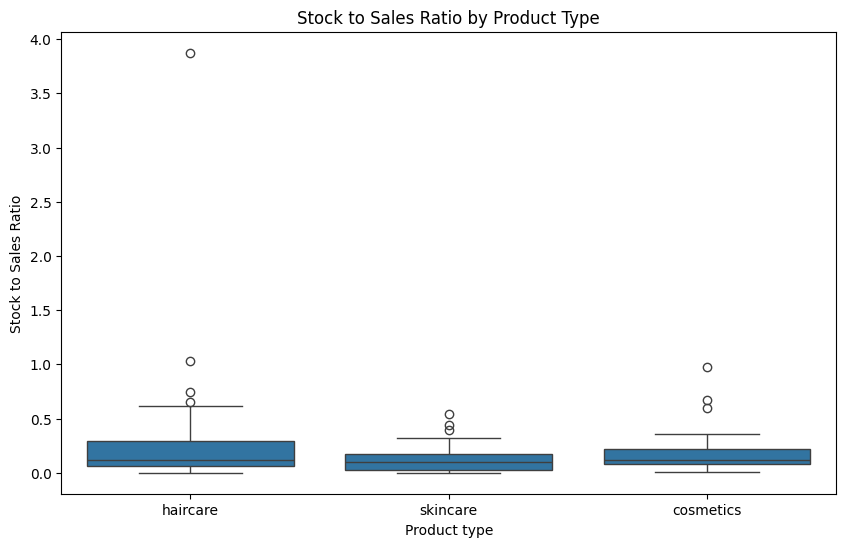

In [21]:
# Calculating the ratio of stock levels to sales to understand inventory turnover
dataset['Stock to Sales Ratio'] = dataset['Stock levels'] / dataset['Number of products sold']

# Plotting stock to sales ratio by product type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Stock to Sales Ratio', data=dataset)
plt.title('Stock to Sales Ratio by Product Type')
plt.ylabel('Stock to Sales Ratio')
plt.show()


**4.2.4 Revenue generated by SKU**

In [22]:
revenue_chart = px.line(dataset, x='SKU',
                        y='Revenue generated',
                        title='Revenue Generated by SKU')
revenue_chart.show()

## 4.3 Operational Efficiency

**4.3.1** Assessing the efficiency of operations based on lead times, order quantities, and shipping times.

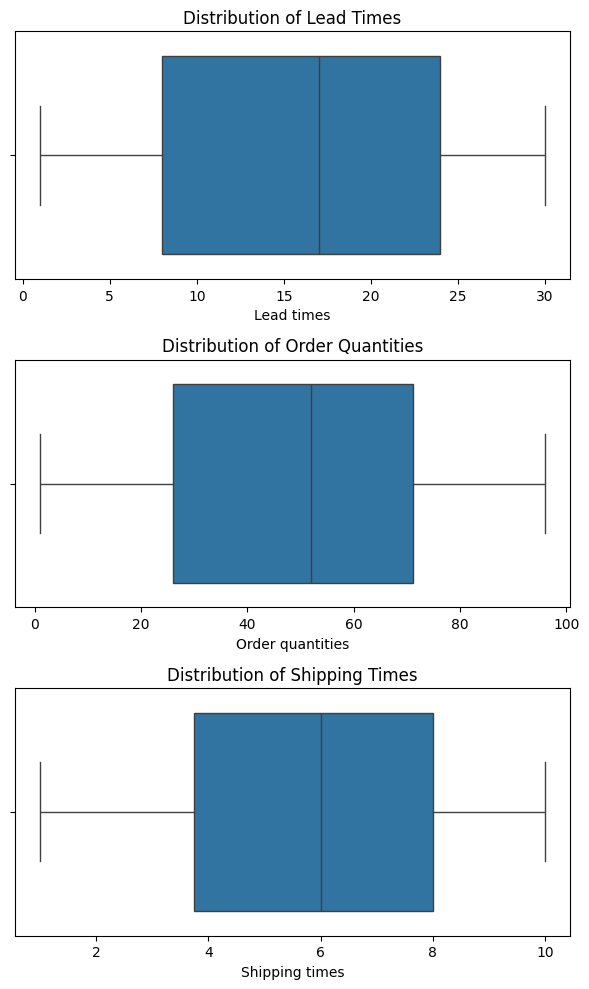

In [24]:
# Summarizing lead times, order quantities, and shipping times
operational_efficiency = dataset[['Lead times', 'Order quantities', 'Shipping times']].describe()

# Visualizing operational efficiency metrics
fig, axs = plt.subplots(3, 1, figsize=(6, 10))
sns.boxplot(x='Lead times', data=dataset, ax=axs[0])
axs[0].set_title('Distribution of Lead Times')

sns.boxplot(x='Order quantities', data=dataset, ax=axs[1])
axs[1].set_title('Distribution of Order Quantities')

sns.boxplot(x='Shipping times', data=dataset, ax=axs[2])
axs[2].set_title('Distribution of Shipping Times')
plt.tight_layout()
plt.show()


- COMMENT

**4.3.2 Average Lead Time and Average Manufacturing Cost**

In [25]:
avg_lead_time = dataset.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = dataset.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


**4.3.3 Total Revenue by Shipping Carrier**

In [26]:
total_revenue = dataset.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Revenue Generated')
fig.show()

**4.3.4 Shipping Costs by Carrier**

In [27]:
shipping_cost_chart = px.bar(dataset, x='Shipping carriers',
                             y='Shipping costs',
                             title='Shipping Costs by Carrier')
shipping_cost_chart.show()

**4.3.5 Cost Distribution by Transportation Mode**

In [28]:
transportation_chart = px.pie(dataset,
                              values='Costs',
                              names='Transportation modes',
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

## 4.4 Quality Control

**4.4.1 Average Defect Rates by Product Type**

In [29]:
defect_rates_by_product = dataset.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Average Defect Rates by Product Type')
fig.show()

- COMMENT

**4.4.2 Defect Rates by Transportation Mode**

In [30]:
pivot_table = pd.pivot_table(dataset, values='Defect rates',
                             index=['Transportation modes'],
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"],
                              names=pivot_table.index,
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

**4.4.3 Inspection Result**

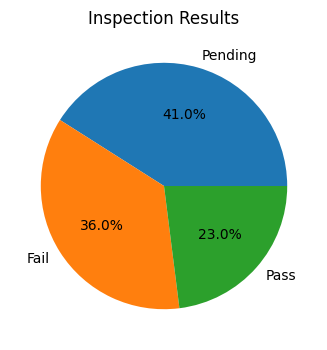

In [35]:
# Analyzing Inspection Result
inspection_summary = dataset['Inspection results'].value_counts()

plt.figure(figsize=(8, 4))
inspection_summary.plot(kind='pie', autopct='%1.1f%%')
plt.title('Inspection Results')
plt.ylabel('')
plt.show()


- Comment